In [1]:
from sympy import *
init_printing()

In [2]:
v = [Symbol(f'v_{{{i}}}') for i in range(10)]
a = [Symbol(f'a_{{{i}}}') for i in range(10)]

### toy function $f_1$

In [3]:
def f1(x, y, z):
    return \
        x + y*2, \
        cos(z + y)

In [4]:
Jf1 = Matrix(f1(*v[:3])).jacobian(v[:3]).applyfunc(simplify)
Jf1

⎡1           2                    0         ⎤
⎢                                           ⎥
⎣0  -sin(v_{1} + v_{2})  -sin(v_{1} + v_{2})⎦

### toy function $f_2$

In [5]:
def f2(x, y):
    return \
        x**2 + y**2, \
        x * y, \
        x / y

In [6]:
Jf2 = Matrix(f2(*v[:2])).jacobian(v[:2]).applyfunc(simplify)
Jf2

⎡2⋅v_{0}  2⋅v_{1}⎤
⎢                ⎥
⎢ v_{1}    v_{0} ⎥
⎢                ⎥
⎢   1     -v_{0} ⎥
⎢ ─────   ───────⎥
⎢ v_{1}         2⎥
⎣          v_{1} ⎦

### toy function $f_3$

In [7]:
def f3(x, y, z):
    return x + y - z,

In [8]:
Jf3 = Matrix(f3(*v[:3])).jacobian(v[:3]).applyfunc(simplify)
Jf3

[1  1  -1]

### toy function $f = f_3 \circ f_2 \circ f_1$

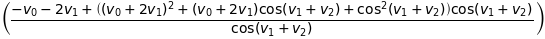

In [9]:
f = tuple(f_.simplify() for f_ in f3(*f2(*f1(*v[:3]))))
f

### compute $J_f$ from $f$

In [10]:
Jf = Matrix(f).jacobian(v[:3]).applyfunc(simplify)
Jf.T

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢  5⋅v_{0}⋅sin(v_{1} + v_{2})   v_{0}⋅sin(3⋅v_{1} + 3⋅v_{2})                  
⎢- ────────────────────────── - ──────────────────────────── + 2⋅v_{0}⋅cos(2⋅v
⎢              4                             4                                
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

### compute $J_f$ from $J_{f_3}(f_2(f_1(x)))J_{f_2}(f_1(x))J_{f_1}(x)$

In [11]:
Jf_2 = ( \
    Jf3.subs({v_:p_ for v_,p_ in zip(v, f2(*f1(*a[:3])))}) @ \
    Jf2.subs({v_:p_ for v_,p_ in zip(v, f1(*a[:3]))}) @ \
    Jf1.subs({v_:p_ for v_,p_ in zip(v, a[:3])})
).subs({v_:p_ for v_,p_ in zip(a,v)}).applyfunc(simplify)
Jf_2.T

⎡                                                                             
⎢                                                                 2⋅v_{0} + 4⋅
⎢                                                                             
⎢                                                                             
⎢  ⎛                                                              2           
⎢- ⎝v_{0} + 2⋅v_{1} + (v_{0} + 2⋅v_{1} + 2⋅cos(v_{1} + v_{2}))⋅cos (v_{1} + v_
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                             ⎛                               
⎢                                            -⎝v_{0} + 2⋅v_{1} + (v_{0} + 2⋅v_
⎢                                            ───────

### sanity check the two differently computed $J_f$

In [12]:
display(Jf.subs({v_:p_ for v_,p_ in zip(v, [1,2,3])}).evalf())
display(Jf_2.subs({v_:p_ for v_,p_ in zip(v, [1,2,3])}).evalf())

[6.75834209964714  78.4423139431183  64.925629743824]

[6.75834209964714  78.4423139431183  64.925629743824]

### automatic differentiation sanity test

In [13]:
p = (1, 2, 3)
grads = eye(3)
display(grads)
grads = Jf1.subs({v_:p_ for v_,p_ in zip(v, p)}).evalf() @ grads
display(grads)
p = f1(*p)
grads = Jf2.subs({v_:p_ for v_,p_ in zip(v, p)}).evalf() @ grads
display(grads)
p = f2(*p)
grads = Jf3.subs({v_:p_ for v_,p_ in zip(v, p)}).evalf() @ grads
display(grads)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

⎡1.0         2.0                 0        ⎤
⎢                                         ⎥
⎣ 0   0.958924274663138  0.958924274663138⎦

⎡      10.0         20.5440211108894   0.54402111088937 ⎤
⎢                                                       ⎥
⎢0.283662185463226  5.36194574424214   4.79462137331569 ⎥
⎢                                                       ⎥
⎣3.52532008581609   -52.5363470879868  -59.5869872596189⎦

[6.75834209964714  78.4423139431183  64.925629743824]